<a href="https://colab.research.google.com/github/team5INFO5731/INFO5731-FinalProject/blob/main/TopicModelling_on_Long_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TopicModelling on Long Text**

In [2]:
''' This would be a long text dataset
This dataset can be downloaded from kaggle,
Data scraped from CNBC contains the headlines, last updated date, and the preview text of articles from the end of December 2017 to July 19th, 2020.
'''
# Load data
import pandas as pd
input_df=pd.read_csv("/content/cnbc_headlines.csv")
print(input_df.head())

                                           Headlines  ...                                        Description
0  Jim Cramer: A better way to invest in the Covi...  ...  "Mad Money" host Jim Cramer recommended buying...
1     Cramer's lightning round: I would own Teradyne  ...  "Mad Money" host Jim Cramer rings the lightnin...
2                                                NaN  ...                                                NaN
3  Cramer's week ahead: Big week for earnings, ev...  ...  "We'll pay more for the earnings of the non-Co...
4  IQ Capital CEO Keith Bliss says tech and healt...  ...  Keith Bliss, IQ Capital CEO, joins "Closing Be...

[5 rows x 3 columns]


**EDA - Exploratory data analysis**

In [3]:
# Find the shape of the dataset
input_df.shape

(3080, 3)

In [4]:
# Find the basic info of the dataset, to check if there are any null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [5]:
#null values are present in the dataset as the shape and nonnull values from the info() dot match
print(input_df.isnull().sum())
# Dropping the null values
input_df=input_df.dropna()

Headlines      280
Time           280
Description    280
dtype: int64


**Data Cleaning**

In [6]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['Description'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Headlines,Time,Description,cleaned_data
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying...",mad money host jim cramer recommended buying f...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin...",mad money host jim cramer rings lightning roun...
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co...",pay earnings non covid companies lancet publis...
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be...",keith bliss iq capital ceo joins closing bell ...
5,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies...",look stocks high quality companies going lower...
...,...,...,...,...
3075,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f...",according kensho markets fared week christmas ...
3076,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...,jim cramer revealed top rule comes taxes selli...
3077,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...,jim cramer broke owning fewer stocks help make...
3078,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di...",jim cramer built nobody ever made dime panicki...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [8]:
import sys
sys.path.insert(1,'/content/')

**LDA TEXT MODELLING**

In [9]:
import AlgorithmLDA as lda_ul
result = lda_ul.LDA_MODEL(10,tf,tf_feature_names,10)
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,cramer,306.6,take,238.1,stock,109.4,cramer,173.0,says,127.7,ceo,374.2,money,337.8,cramer,505.9,cramer,338.6,round,181.1
1,jim,301.5,cramer,234.5,jim,106.6,jim,169.0,p,98.5,jim,272.2,mad,300.7,jim,497.7,jim,335.4,means,177.1
2,earnings,180.3,jim,227.8,cramer,105.8,says,79.7,year,93.8,cramer,265.2,said,259.1,market,297.3,says,194.2,lightning,174.2
3,week,118.8,including,211.1,picks,91.1,wall,79.1,cramer,60.7,company,177.1,host,255.5,explains,173.5,stocks,178.1,questions,169.5
4,investors,97.5,callers,207.6,takes,90.1,street,79.1,jim,56.9,sits,124.1,says,93.6,stock,167.9,cnbc,156.8,rapid,168.2
5,shares,83.7,stocks,206.9,day,76.1,market,63.0,latest,53.1,tells,51.1,ceo,70.9,could,121.5,trade,125.4,jim,167.7
6,breaks,82.5,favorite,174.8,calls,70.1,stocks,63.0,good,53.1,chairman,49.4,think,44.4,investors,88.2,china,111.7,cramer,167.6
7,says,80.9,play,127.1,thoughts,53.1,president,58.0,markets,40.8,health,42.1,market,43.0,says,82.5,investors,87.8,answers,167.3
8,ahead,79.5,one,54.2,delivers,43.1,federal,56.1,look,38.8,growth,37.7,make,33.0,like,76.0,u,79.7,stock,167.2
9,stock,75.8,stock,53.8,gives,41.1,reserve,53.1,last,37.1,founder,34.1,stocks,27.5,reveals,67.9,business,41.2,speed,164.9


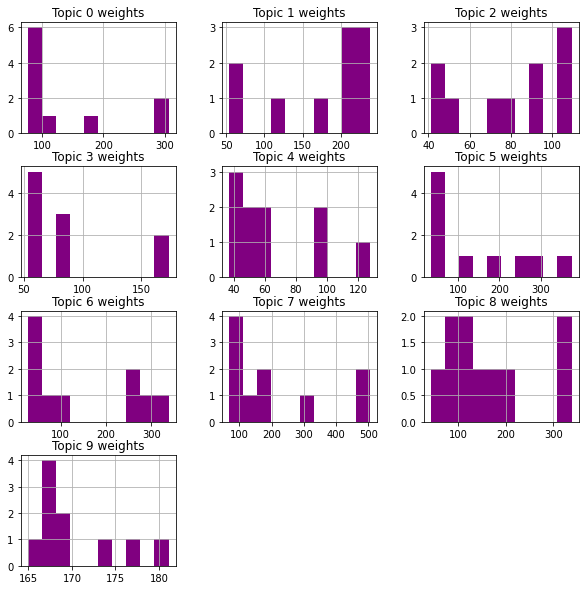

In [10]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'Purple')
plt.show(block=False)

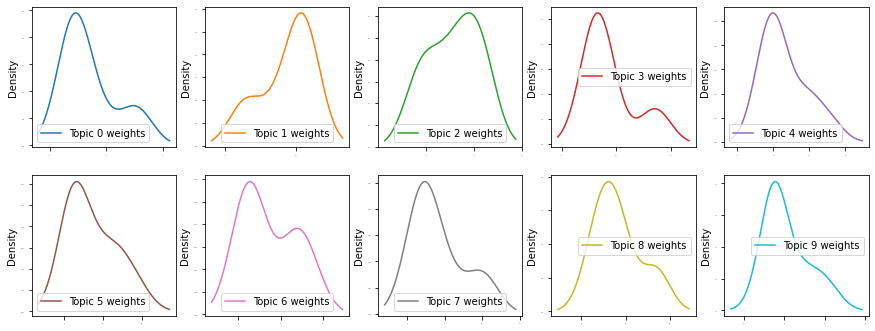

In [11]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

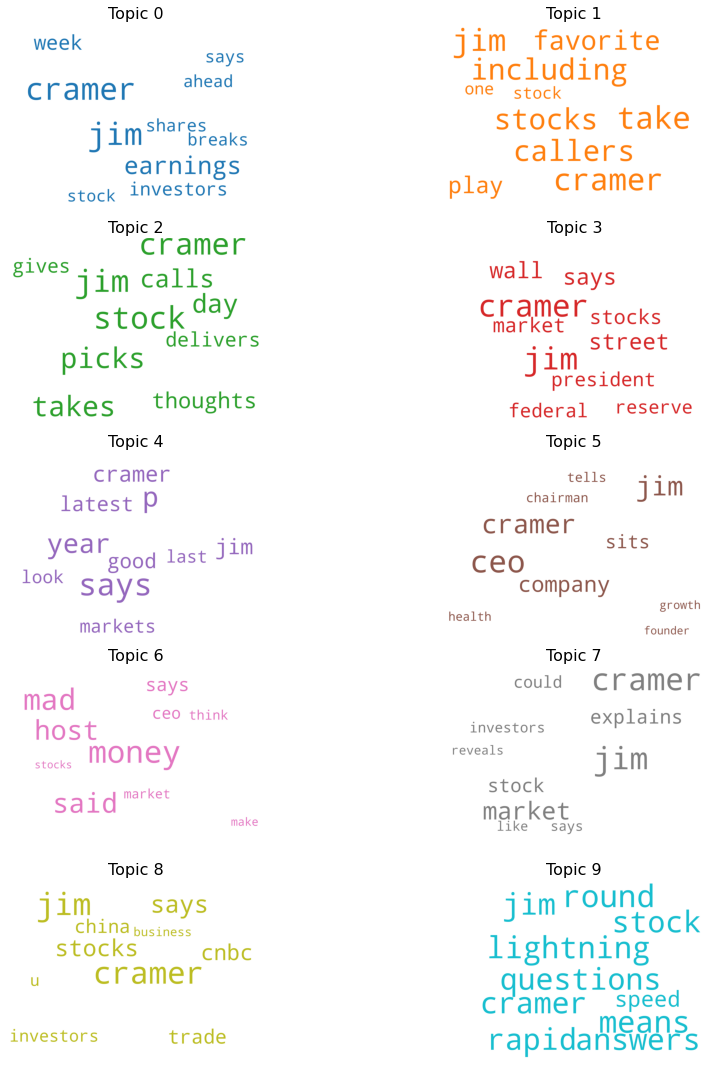

In [12]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LSA TOPIC MODELLING**

In [13]:
import AlgorithmLSA as lsa
lsa_result=lsa.LSA_MODEL(tf,vectorizer)
lsa_result

,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,cramer,0.593945,mad,0.303179,callers,0.338979,stocks,0.513974,ceo,0.587464,says,0.685302,stock,0.487395,market,0.602246,stocks,0.581028,investors,0.406176,could,0.361282,earnings,0.464325,cnbc,0.597404,could,0.573017,stock,0.297572,explains,0.630154,explains,0.520167,company,0.789862,wall,0.624107,breaks,0.399058
1,jim,0.591615,money,0.302195,including,0.266891,take,0.287561,company,0.199655,ceo,0.293789,ceo,0.425440,ceo,0.245366,investors,0.359739,u,0.370984,u,0.346887,week,0.318960,said,0.293702,explains,0.276369,stocks,0.267064,cnbc,0.320283,said,0.397902,cnbc,0.193861,street,0.623677,earnings,0.321658
2,stock,0.197508,host,0.298351,favorite,0.261544,money,0.276467,said,0.180825,callers,0.135520,market,0.408142,stocks,0.168111,cnbc,0.231405,trade,0.358536,trade,0.331967,cnbc,0.318298,stock,0.174301,earnings,0.276272,trade,0.189008,take,0.152863,time,0.121369,u,0.145175,explains,0.153691,companies,0.204789
3,callers,0.156339,questions,0.220373,take,0.224489,including,0.257197,sits,0.170834,lightning,0.087319,said,0.179926,means,0.146761,ceo,0.218301,china,0.341849,china,0.288924,ahead,0.213811,one,0.146495,stock,0.259181,china,0.162466,breaks,0.150588,think,0.107522,apple,0.119580,company,0.128726,u,0.201073
4,stocks,0.140761,rapid,0.220359,stocks,0.210828,mad,0.256634,mad,0.096186,speed,0.085644,including,0.162904,lightning,0.141799,stock,0.212283,earnings,0.211613,explains,0.136558,reports,0.133520,breaks,0.146098,stocks,0.238553,company,0.109447,favorite,0.135510,earnings,0.104923,p,0.115391,week,0.097276,shares,0.193708
5,money,0.135649,answers,0.219969,play,0.154402,favorite,0.254079,money,0.095777,questions,0.075037,favorite,0.161877,bell,0.135662,picks,0.151182,including,0.183346,said,0.125317,market,0.127283,buy,0.119501,company,0.148811,sits,0.108807,money,0.105181,year,0.095315,earnings,0.111230,one,0.074632,said,0.164314
6,mad,0.127638,speed,0.219637,speed,0.100864,host,0.225128,chairman,0.069932,round,0.071799,callers,0.156050,round,0.134807,takes,0.145690,week,0.179077,takes,0.120622,takes,0.112947,street,0.107815,p,0.142111,one,0.108800,picks,0.094945,going,0.077984,said,0.103499,market,0.063427,take,0.163981


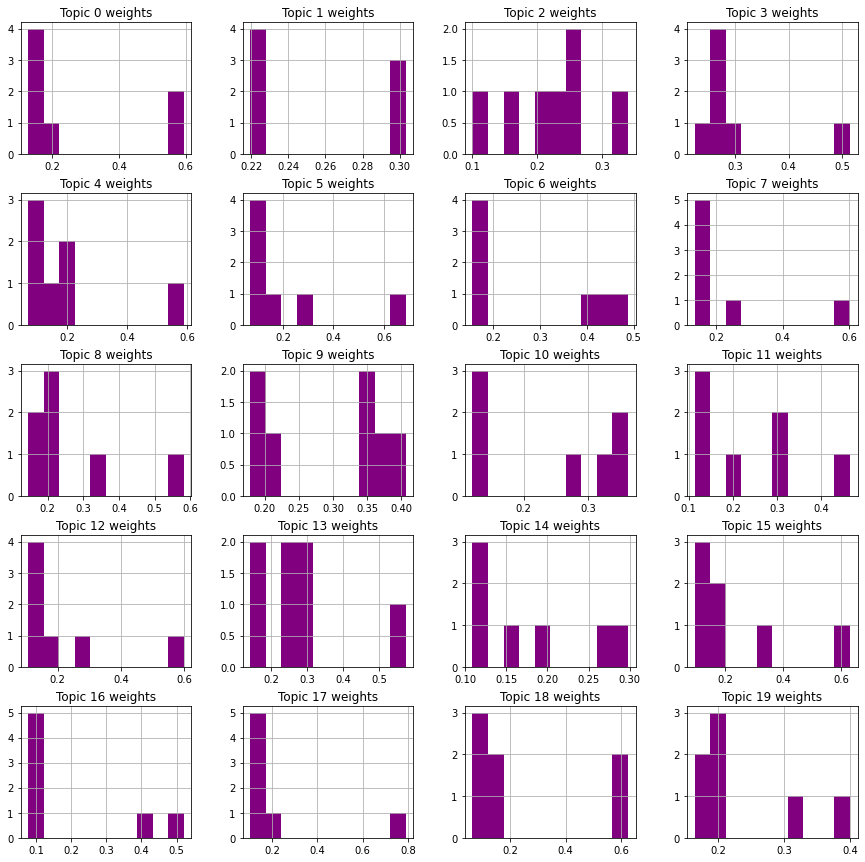

In [14]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'purple')
plt.show(block=False)

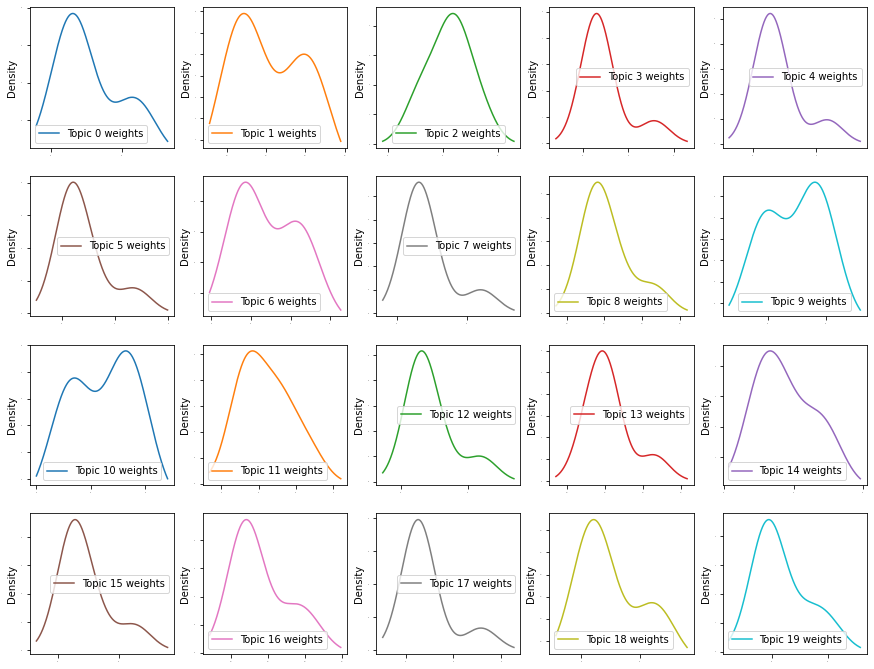

In [15]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

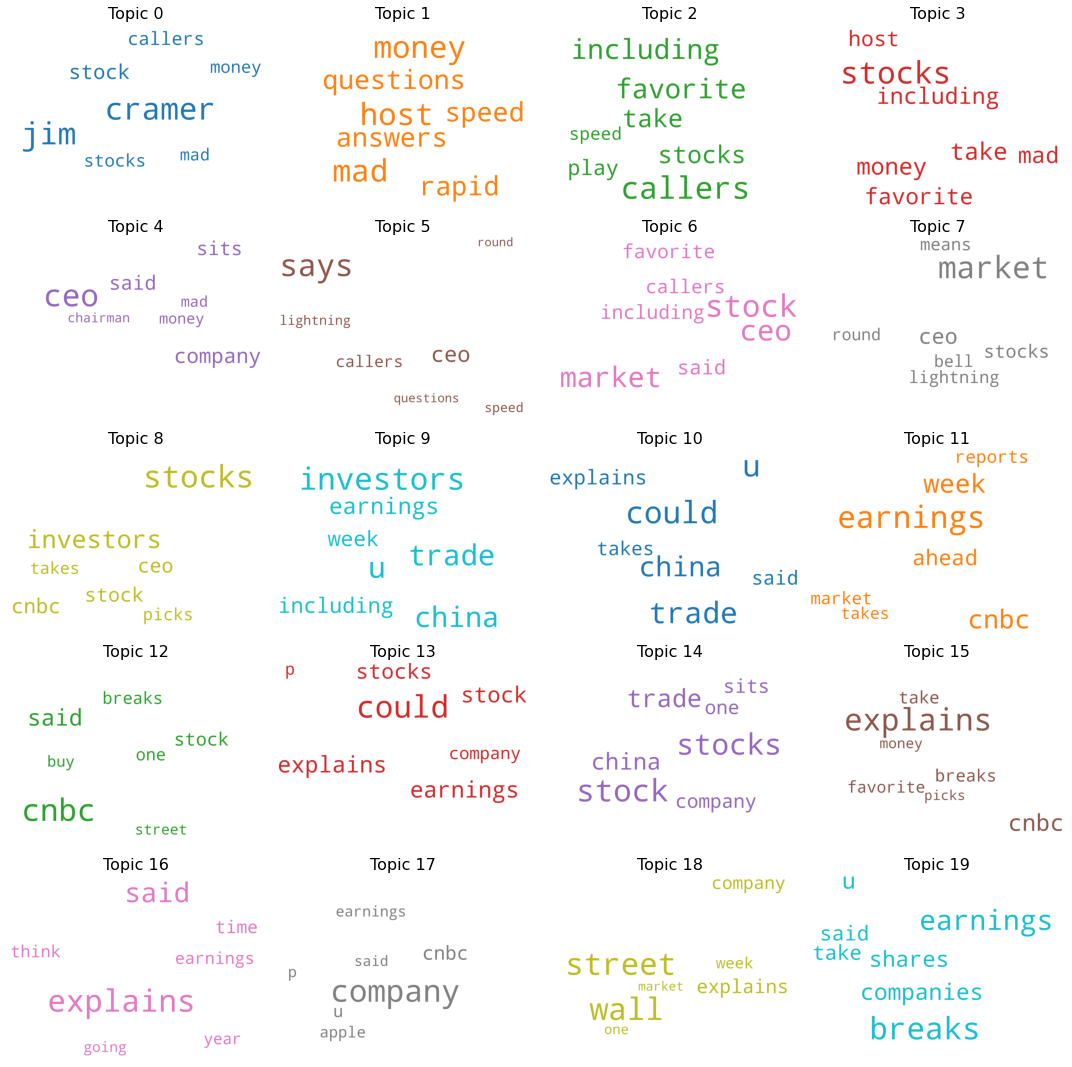

In [16]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**HMM-LDA TOPIC MODELLING**

In [18]:
import AlgorithmHMMLDA as HMMLDA

In [25]:
import nltk
nltk.download('words')
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [26]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)

[[['mad', 'money', 'host', 'jim', 'cramer', 'recommended', 'buying', 'four', 'companies', 'supporting', 'vaccine', 'developers'], ['mad', 'money', 'host', 'jim', 'cramer', 'rings', 'lightning', 'round', 'bell', 'means', 'giving', 'answers', 'callers', 'stock', 'questions', 'rapid', 'speed'], ['pay', 'earnings', 'non', 'covid', 'companies', 'lancet', 'publishes', 'good', 'news', 'astrazeneca', 'vaccine', 'trial', 'cramer', 'said'], ['keith', 'bliss', 'iq', 'capital', 'ceo', 'joins', 'closing', 'bell', 'talk', 'broader', 'markets', 'including', 'performance', 'p', 'nasdaq'], ['look', 'stocks', 'high', 'quality', 'companies', 'going', 'lower', 'even', 'though', 'deserve', 'go', 'higher', 'mad', 'money', 'host', 'advised'], ['mad', 'money', 'host', 'jim', 'cramer', 'rings', 'lightning', 'round', 'bell', 'means', 'giving', 'answers', 'callers', 'stock', 'questions', 'rapid', 'speed'], ['investing', 'per', 'day', 'compound', 'time', 'child', 'reaches', 'adulthood', 'said', 'noah', 'kerner', 

In [27]:
n_voca = len(voca)
n_topic = 20
n_class = 20
max_iter = 100
model = HMMLDA.HMM_LDA(len(corpus), n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [28]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [29]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  impacted,better,fed,future,key,weakness,favorite,broke,worth,mean
Topic 1 :  depot,electric,cloud,change,sign,president,cruise,run,see,committee
Topic 2 :  mad,go,interview,seem,away,price,bring,business,third,exposure
Topic 3 :  mad,soar,profile,anybody,gaming,war,joseph,announcement,activist,forest
Topic 4 :  fed,new,advice,recent,outlook,price,approach,hans,party,ramped
Topic 5 :  solely,bring,president,p,days,stocks,manufacturer,interest,last,job
Topic 6 :  mad,dividend,move,guessing,one,report,animal,health,find,week
Topic 7 :  mad,chairman,despite,manage,chief,price,people,really,make,see
Topic 8 :  mad,year,environment,today,really,namely,economy,cohort,getting,next
Topic 9 :  mad,deal,get,sometimes,take,better,batten,sell,best,wendy
Topic 10 :  mad,downside,portfolio,high,job,impact,move,bed,rate,trade
Topic 11 :  mad,proceeds,amid,move,technical,twice,go,got,one,else
Topic 12 :  severe,could,two,indictment,zips,obscure,global,kevin,exchange,modern
Topic 13 :  next,s

**Supervised LDA TOPIC MODELLING**

In [ ]:
!pip install pymc

In [31]:
training_data = input_df['cleaned_data'].values

In [32]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
nltk.download('words')

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [33]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [34]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [35]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [36]:
import AlgorithmsupervisedLDA as slda

In [37]:
n_doc = len(corpus)
n_voca = voca.size

In [38]:
n_doc

2800

In [39]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,2800)]

In [40]:
model = slda.SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [41]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

Eta -3.573021149755197 
Topic 8 :	 market,said,could,host,new,company,growth,take,even,year
Eta -1.4094897792986736 
Topic 5 :	 company,host,economy,said,could,recent,financial,buy,business,investment
Eta -0.42492430633035744 
Topic 4 :	 earnings,trade,week,china,ahead,said,trump,street,president,wall
Eta -0.3746821160580253 
Topic 6 :	 market,take,favorite,time,one,high,look,like,oil,going
Eta 0.06732269411815811 
Topic 9 :	 lightning,speed,round,rapid,host,bell,giving,favorite,play,take
Eta 0.2305371783656252 
Topic 7 :	 market,could,think,technician,better,much,higher,run,best,group
Eta 1.9197870533719708 
Topic 1 :	 market,street,apple,wall,company,earnings,take,sector,still,day
Eta 2.287086928684595 
Topic 2 :	 said,market,take,host,year,play,one,favorite,new,oil
Eta 2.8219861196173532 
Topic 3 :	 host,china,speed,market,earnings,could,lightning,federal,giving,trade
Eta 6.835985535015978 
Topic 0 :	 host,market,said,favorite,speed,company,round,could,rapid,bell


**Bi-Term TOPIC MODELLING**

In [ ]:
!pip install biterm

In [43]:
import sys
sys.path.insert(1,'/content/')
import AlgorithmBITERM as btm_model
topics = btm_model.BITERM_MODEL(tf,vectorizer)

100%|██████████| 100/100 [06:35<00:00,  3.96s/it]
/content/AlgorithmBITERM.py:8: RuntimeWarning: invalid value encountered in true_divide
  topics = btm.fit_transform(biterms, iterations=100)


In [44]:
topics

array([[3.31337585e-01, 7.38999281e-04, 9.19399205e-02, ...,
        3.61370528e-02, 1.42946546e-03, 1.60632117e-06],
       [1.61542958e-02, 8.66420151e-03, 3.18184328e-03, ...,
        5.76926524e-03, 8.79264155e-04, 2.64085331e-07],
       [4.14245498e-02, 8.11341388e-06, 9.65698397e-02, ...,
        3.28965801e-05, 3.58600330e-02, 6.65506766e-06],
       ...,
       [2.29889156e-01, 7.45372139e-04, 3.10333191e-01, ...,
        3.30722012e-02, 1.62956941e-02, 4.69452924e-06],
       [3.49813021e-01, 2.59255659e-03, 1.28231318e-01, ...,
        1.56149476e-09, 1.72165381e-02, 2.53056524e-06],
       [3.34017721e-01, 3.59695674e-02, 2.95204406e-02, ...,
        1.44477411e-08, 1.17788335e-02, 2.34140725e-05]])

In [45]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))

mad money host jim cramer recommended buying four companies supporting vaccine developers (topic: 0)
mad money host jim cramer rings lightning round bell means giving answers callers stock questions rapid speed (topic: 10)
pay earnings non covid companies lancet publishes good news astrazeneca vaccine trial cramer said (topic: 14)
keith bliss iq capital ceo joins closing bell talk broader markets including performance p nasdaq (topic: 13)
look stocks high quality companies going lower even though deserve go higher mad money host advised (topic: 14)
mad money host jim cramer rings lightning round bell means giving answers callers stock questions rapid speed (topic: 10)
investing per day compound time child reaches adulthood said noah kerner ceo micro investing app acorns (topic: 0)
hundreds companies cut suspended dividends far year second half year investors feel reductions (topic: 14)
able capture cultural moments like espn release last dance earlier year ceo scott cutler said mad mon